# Challenge Set 1
Topic:        Explore MTA turnstile data  
Date:         9/20/2016  
Name:         Kaushik Vasudevan  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import dateutil
import datetime

%matplotlib inline

# Exercise 1.1

Get MTA Data

In [2]:
df = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')
df.columns = df.columns.str.strip()

In [3]:
df = df.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME')).sum().reset_index()
df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,09/10/2016,00:00:00,5817505,1971936
1,A002,R051,02-00-00,59 ST,09/10/2016,04:00:00,5817544,1971940
2,A002,R051,02-00-00,59 ST,09/10/2016,08:00:00,5817564,1971981
3,A002,R051,02-00-00,59 ST,09/10/2016,12:00:00,5817678,1972094
4,A002,R051,02-00-00,59 ST,09/10/2016,16:00:00,5817925,1972180
5,A002,R051,02-00-00,59 ST,09/10/2016,20:00:00,5818247,1972245
6,A002,R051,02-00-00,59 ST,09/11/2016,00:00:00,5818403,1972285
7,A002,R051,02-00-00,59 ST,09/11/2016,04:00:00,5818439,1972293
8,A002,R051,02-00-00,59 ST,09/11/2016,08:00:00,5818451,1972308
9,A002,R051,02-00-00,59 ST,09/11/2016,12:00:00,5818522,1972380


# Exercise 1.2  

Turn this into a time series.  


In [4]:
#Combine date and time columns to get date_time

df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format = "%m/%d/%Y %H:%M:%S")

df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,09/10/2016,00:00:00,5817505,1971936,2016-09-10 00:00:00
1,A002,R051,02-00-00,59 ST,09/10/2016,04:00:00,5817544,1971940,2016-09-10 04:00:00
2,A002,R051,02-00-00,59 ST,09/10/2016,08:00:00,5817564,1971981,2016-09-10 08:00:00
3,A002,R051,02-00-00,59 ST,09/10/2016,12:00:00,5817678,1972094,2016-09-10 12:00:00
4,A002,R051,02-00-00,59 ST,09/10/2016,16:00:00,5817925,1972180,2016-09-10 16:00:00
5,A002,R051,02-00-00,59 ST,09/10/2016,20:00:00,5818247,1972245,2016-09-10 20:00:00
6,A002,R051,02-00-00,59 ST,09/11/2016,00:00:00,5818403,1972285,2016-09-11 00:00:00
7,A002,R051,02-00-00,59 ST,09/11/2016,04:00:00,5818439,1972293,2016-09-11 04:00:00
8,A002,R051,02-00-00,59 ST,09/11/2016,08:00:00,5818451,1972308,2016-09-11 08:00:00
9,A002,R051,02-00-00,59 ST,09/11/2016,12:00:00,5818522,1972380,2016-09-11 12:00:00


# Exercise 1.3  
  
Daily Data 

In [5]:
df.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE')).sum()
df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,09/10/2016,00:00:00,5817505,1971936,2016-09-10 00:00:00
1,A002,R051,02-00-00,59 ST,09/10/2016,04:00:00,5817544,1971940,2016-09-10 04:00:00
2,A002,R051,02-00-00,59 ST,09/10/2016,08:00:00,5817564,1971981,2016-09-10 08:00:00
3,A002,R051,02-00-00,59 ST,09/10/2016,12:00:00,5817678,1972094,2016-09-10 12:00:00
4,A002,R051,02-00-00,59 ST,09/10/2016,16:00:00,5817925,1972180,2016-09-10 16:00:00
5,A002,R051,02-00-00,59 ST,09/10/2016,20:00:00,5818247,1972245,2016-09-10 20:00:00
6,A002,R051,02-00-00,59 ST,09/11/2016,00:00:00,5818403,1972285,2016-09-11 00:00:00
7,A002,R051,02-00-00,59 ST,09/11/2016,04:00:00,5818439,1972293,2016-09-11 04:00:00
8,A002,R051,02-00-00,59 ST,09/11/2016,08:00:00,5818451,1972308,2016-09-11 08:00:00
9,A002,R051,02-00-00,59 ST,09/11/2016,12:00:00,5818522,1972380,2016-09-11 12:00:00


# Exercise 1.4  
  
Plot daily data


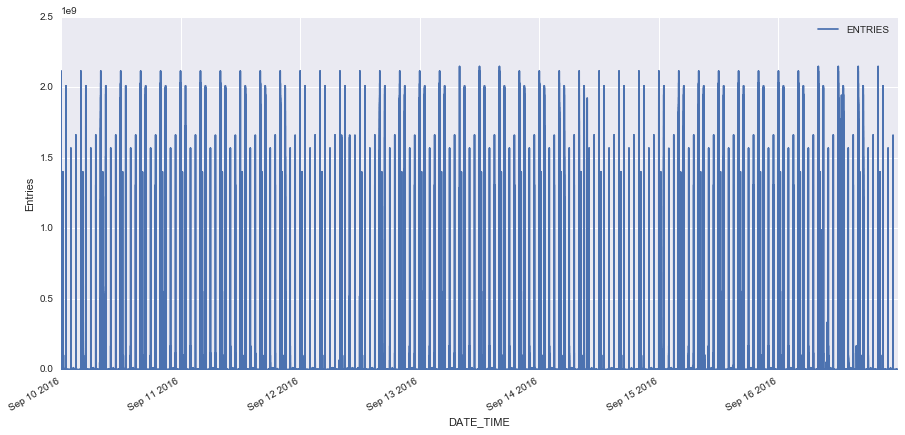

In [6]:
df.plot('DATE_TIME','ENTRIES', figsize=(15,7)).set(ylabel='Entries')

# Exercise 1.5  
  
Combine Turnstiles

In [7]:
df.groupby(('C/A', 'UNIT', 'STATION', 'SCP', 'DATE')).sum()

ENTRIES     EXITS
C/A   UNIT STATION       SCP      DATE                          
A002  R051 59 ST         02-00-00 09/10/2016  34906463  11832376
                                  09/11/2016  34911511  11834174
                                  09/12/2016  34916977  11836614
                                  09/13/2016  34927101  11840072
                                  09/14/2016  34937680  11843661
                                  09/15/2016  34948060  11847319
                                  09/16/2016  34959045  11850941
                         02-00-01 09/10/2016  32066341   7036834
                                  09/11/2016  32071003   7037931
                                  09/12/2016  32075871   7039255
                                  09/13/2016  32084025   7041194
                                  09/14/2016  32093088   7043267
                                  09/15/2016  32101856   7045250
                                  09/16/2016  32110608   7047074
                         02-03-00 09/10/2016   4602710  17308857
                                  09/11/2016   4606996  17318191
                                  09/12/2016   4611057  17330056
                                  09/13/2016   4617775  17346308
                                  09/14/2016   4624509  17362675
                                  09/15/2016   4631273  17379412
                                  09/16/2016   4638302  17395828
                         02-03-01 09/10/2016  32006772  50703654
                                  09/11/2016  32006772  50710070
                                  09/12/2016  32006772  50718574
                                  09/13/2016  32006772  50732086
                                  09/14/2016  32006772  50746925
                                  09/15/2016  32006772  50761852
                                  09/16/2016  32006772  50775657
                         02-03-02 09/10/2016  30315335  41945605
                                  09/11/2016  30323259  41952209
...                                                ...       ...
TRAM2 R469 RIT-ROOSEVELT 00-00-01 09/15/2016  11149347    116640
                                  09/16/2016  11160403    116680
                         00-03-00 09/10/2016   2032194     84068
                                  09/11/2016   2033697     84138
                                  09/12/2016   2035261     84186
                                  09/13/2016   2036952     84262
                                  09/14/2016   2038691     84346
                                  09/15/2016   2040369     84402
                                  09/16/2016   2042081     84476
                         00-03-01 09/10/2016  15969154   2274023
                                  09/11/2016  15971086   2274094
                                  09/12/2016  15972856   2274185
                                  09/13/2016  15974796   2274255
                                  09/14/2016  15976624   2274321
                                  09/15/2016  15978308   2274375
                                  09/16/2016  15980194   2274458
                         00-05-00 09/10/2016     14280       372
                                  09/11/2016     14286       372
                                  09/12/2016     14288       372
                                  09/13/2016     14302       372
                                  09/14/2016     14313       372
                                  09/15/2016     14319       372
                                  09/16/2016     14329       372
                         00-05-01 09/10/2016     33324      1626
                                  09/11/2016     33324      1626
                                  09/12/2016     33324      1626
                                  09/13/2016     33324      1626
                                  09/14/2016     33324      1626
                                  09/15/2016     33324      1626
                 

# Exercise 1.6 

Combine turnstiles.

In [8]:
df_station = df.groupby(('STATION', 'DATE')).sum().reset_index()
df_station

,STATION,DATE,ENTRIES,EXITS
0,1 AV,09/10/2016,8475086086,8793187433
1,1 AV,09/11/2016,7506972111,7764135392
2,1 AV,09/12/2016,8475286706,8793398566
3,1 AV,09/13/2016,8475413679,8793527733
4,1 AV,09/14/2016,8475553960,8793667512
5,1 AV,09/15/2016,8475698187,8793814177
6,1 AV,09/16/2016,8475844857,8793959330
7,103 ST,09/10/2016,939649604,3581223643
8,103 ST,09/11/2016,939730649,3581297255
9,103 ST,09/12/2016,939852069,3581385827


# Exercise 1.7

Plot for one turnstile.

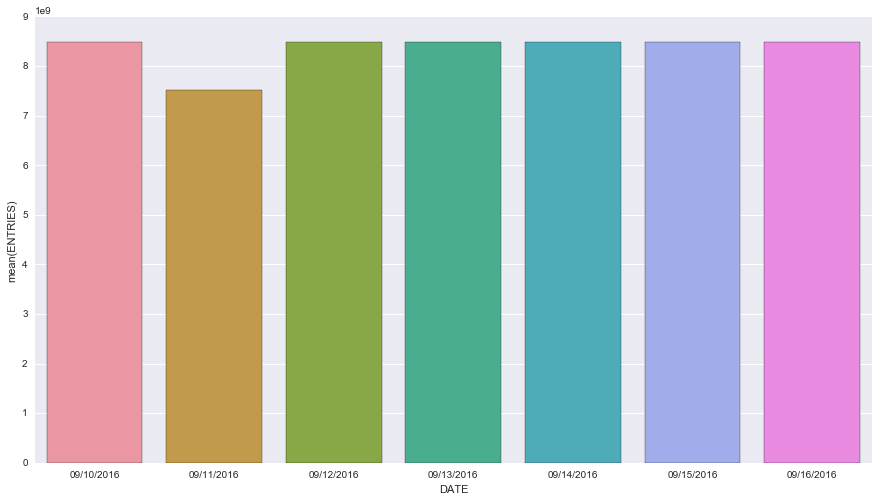

In [9]:
dates_station = df_station[df_station.STATION == '1 AV'].groupby('DATE').sum().reset_index().DATE
counts_station = df_station[df_station.STATION == '1 AV'].groupby('DATE').sum().reset_index().ENTRIES
plt.figure(figsize=(15, 8))
sns.barplot(dates_station, counts_station)

# Exercise 1.8  
  
Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so   it's a list of 7 counts. Make the same list for another week, and another week, and another   week. plt.plot(week_count_list) for every week_count_list you created this way. You should   get a rainbow plot of weekly commute numbers on top of each other.

In [10]:
df  = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt')
df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt')
df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160924.txt')

df_all_weeks = df.append(df1).append(df2).append(df3)

df_all_weeks.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,00:00:00,REGULAR,5817505,1971936
1,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,04:00:00,REGULAR,5817544,1971940
2,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,08:00:00,REGULAR,5817564,1971981
3,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,12:00:00,REGULAR,5817678,1972094
4,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,16:00:00,REGULAR,5817925,1972180
5,A002,R051,02-00-00,59 ST,NQR456,BMT,09/10/2016,20:00:00,REGULAR,5818247,1972245
6,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,00:00:00,REGULAR,5818403,1972285
7,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,04:00:00,REGULAR,5818439,1972293
8,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,08:00:00,REGULAR,5818451,1972308
9,A002,R051,02-00-00,59 ST,NQR456,BMT,09/11/2016,12:00:00,REGULAR,5818522,1972380


In [11]:
df_1 = df1.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME')).sum().reset_index()
df_1["DATE_TIME"] = pd.to_datetime(df_1.DATE + " " + df_1.TIME, format = "%m/%d/%Y %H:%M:%S")
df_1.DATE = df_1.DATE.apply(dateutil.parser.parse)
df_1['Weekday'] = df_1.DATE.apply(datetime.datetime.weekday)

df_2 = df2.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME')).sum().reset_index()
df_2["DATE_TIME"] = pd.to_datetime(df_2.DATE + " " + df_2.TIME, format = "%m/%d/%Y %H:%M:%S")
df_2.DATE = df_2.DATE.apply(dateutil.parser.parse)
df_2['Weekday'] = df_2.DATE.apply(datetime.datetime.weekday)

df_3 = df3.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME')).sum().reset_index()
df_3["DATE_TIME"] = pd.to_datetime(df_3.DATE + " " + df_3.TIME, format = "%m/%d/%Y %H:%M:%S")
df_3.DATE = df_3.DATE.apply(dateutil.parser.parse)
df_3['Weekday'] = df_3.DATE.apply(datetime.datetime.weekday)

df_4 = df.groupby(('C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME')).sum().reset_index()
df_4["DATE_TIME"] = pd.to_datetime(df_4.DATE + " " + df_4.TIME, format = "%m/%d/%Y %H:%M:%S")
df_4.DATE = df_4.DATE.apply(dateutil.parser.parse)
df_4['Weekday'] = df_4.DATE.apply(datetime.datetime.weekday)

In [ ]:
df_1.head(10)

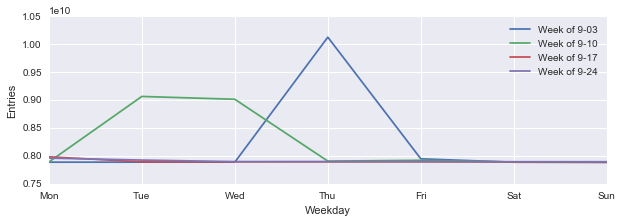

In [12]:
dates_station1 = df_1[df_1.STATION == '59 ST'].groupby('Weekday').sum().reset_index().Weekday
counts_station1 = df_1[df_1.STATION == '59 ST'].groupby('Weekday').sum().reset_index().ENTRIES
dates_station2 = df_2[df_2.STATION == '59 ST'].groupby('Weekday').sum().reset_index().Weekday
counts_station2 = df_2[df_2.STATION == '59 ST'].groupby('Weekday').sum().reset_index().ENTRIES
dates_station3 = df_3[df_3.STATION == '59 ST'].groupby('Weekday').sum().reset_index().Weekday
counts_station3 = df_3[df_3.STATION == '59 ST'].groupby('Weekday').sum().reset_index().ENTRIES
dates_station4 = df_4[df_4.STATION == '59 ST'].groupby('Weekday').sum().reset_index().Weekday
counts_station4 = df_4[df_4.STATION == '59 ST'].groupby('Weekday').sum().reset_index().ENTRIES

plt.figure(figsize=(10,3))
plt.xticks(xrange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.plot(dates_station2, counts_station2, label = 'Week of 9-03')
plt.plot(dates_station1, counts_station1, label = 'Week of 9-10')
plt.plot(dates_station4, counts_station4, label = 'Week of 9-17')
plt.plot(dates_station3, counts_station3, label = 'Week of 9-24')
plt.ylabel('Entries')
plt.xlabel('Weekday')
plt.legend()


# Exercise 1.9  
  
Over multiple weeks, sum total ridership for each station and sort them, so you can find out   the stations with the highest traffic during the time you investigate  

In [21]:
df_stations = df_all_weeks.groupby('STATION').sum().reset_index()[['STATION','ENTRIES']].sort_values('ENTRIES', ascending = False)
df_stations

,STATION,ENTRIES
68,42 ST-PORT AUTH,1337833594132
9,125 ST,1178444383424
84,57 ST-7 AV,1175358898425
46,23 ST,1096582708346
170,CANAL ST,1023363703551
349,TIMES SQ-42 ST,971603661432
3,104 ST,835138108186
223,FULTON ST,696559419281
177,CHAMBERS ST,652418597037
230,GRD CNTRL-42 ST,581476549175


   
# Exercise 1.10  
  
Make a single list of these total ridership values and plot it with "plt.hist(total_ridership_counts)" to get an idea about the distribution of total ridership among different stations.  
  


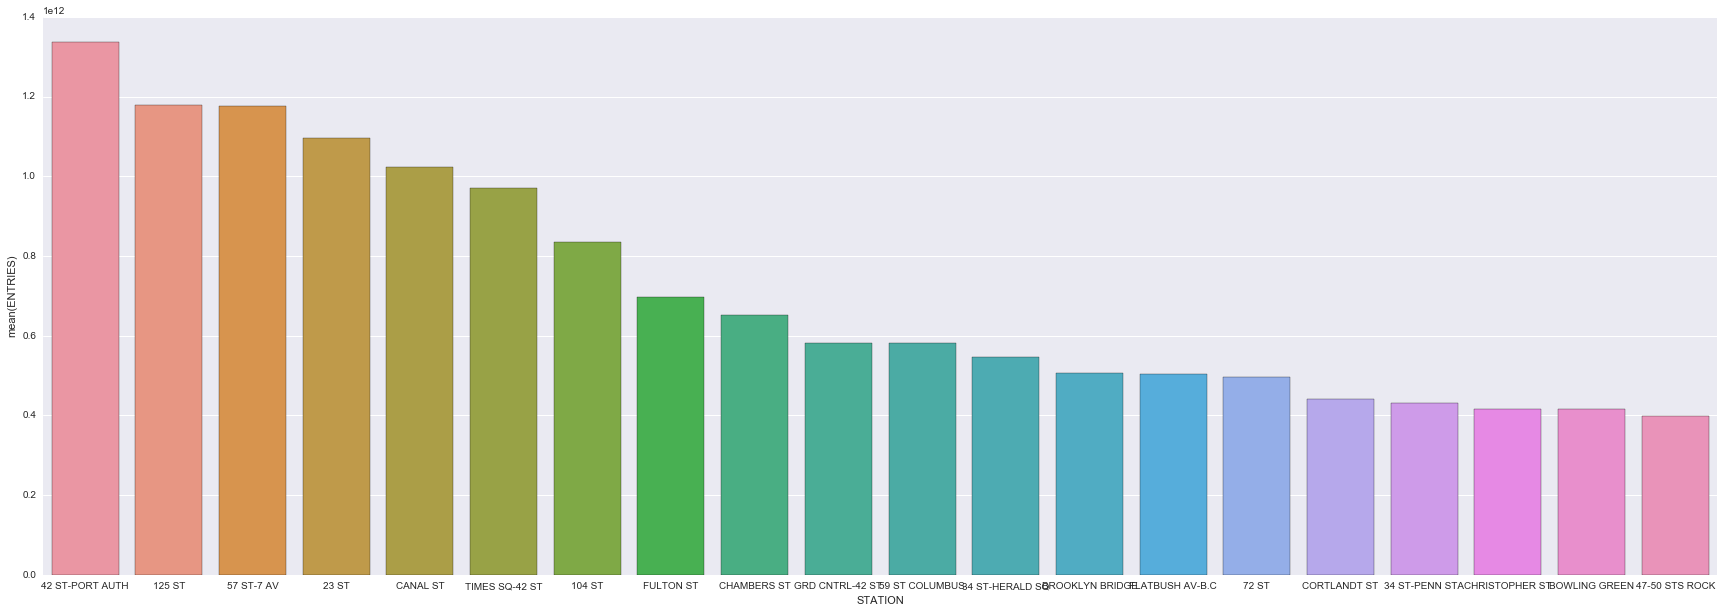

In [25]:
plt.figure(figsize=(30, 10))
shortened_df = df_stations.head(20)

sns.barplot(shortened_df.STATION,shortened_df.ENTRIES)

